In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns


In [2]:
pip install pyreadstat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('cardio_trainn.csv')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [6]:
df.shape

(70000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [9]:
df.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()/len(df)*100

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

In [11]:
df.duplicated().sum()

0

In [12]:
df['gender'].unique()

array([2, 1], dtype=int64)

In [13]:
df['gender'].value_counts(normalize=True)

gender
1    0.650429
2    0.349571
Name: proportion, dtype: float64

In [14]:
pd.get_dummies(df['gender'])

,1,2
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
69995,False,True
69996,True,False
69997,False,True
69998,True,False


In [15]:
df['age'].unique()/365

array([50.39178082, 55.41917808, 51.6630137 , ..., 40.89041096,
       48.56712329, 49.11232877])

In [16]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [17]:
df['cardio'].value_counts(normalize=True)

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

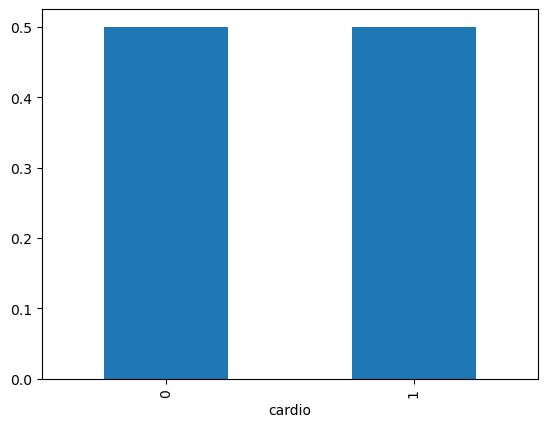

In [18]:
df['cardio'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [19]:
df['cholesterol'].value_counts(normalize=True)

cholesterol
1    0.748357
2    0.136414
3    0.115229
Name: proportion, dtype: float64

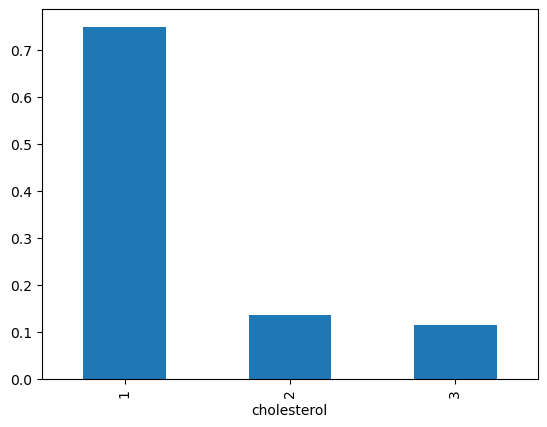

In [20]:
df['cholesterol'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [21]:
df['gluc'].value_counts(normalize=True)

gluc
1    0.849700
3    0.076157
2    0.074143
Name: proportion, dtype: float64

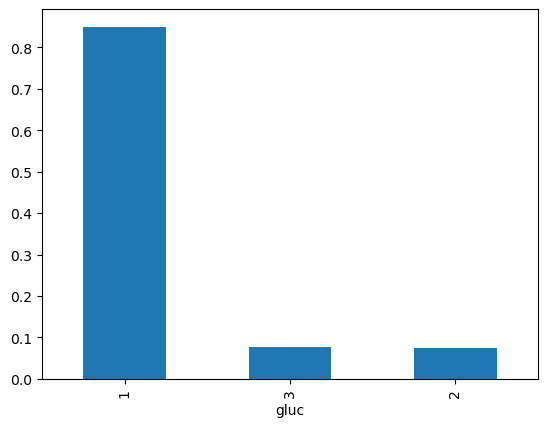

In [22]:
df['gluc'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [23]:
df['smoke'].value_counts(normalize=True)

smoke
0    0.911871
1    0.088129
Name: proportion, dtype: float64

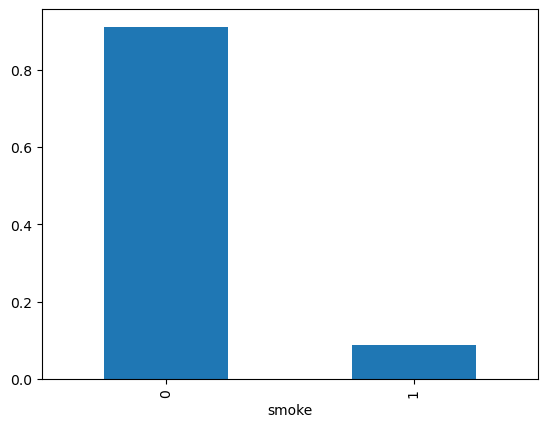

In [24]:
df['smoke'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [25]:
df['alco'].value_counts(normalize=True)

alco
0    0.946229
1    0.053771
Name: proportion, dtype: float64

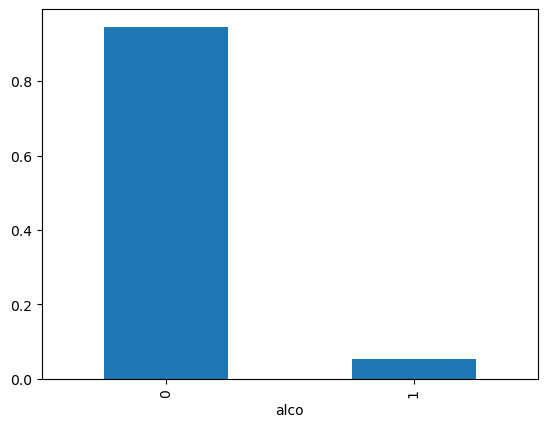

In [26]:
df['alco'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [27]:
df.groupby('gender').mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
1,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
2,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


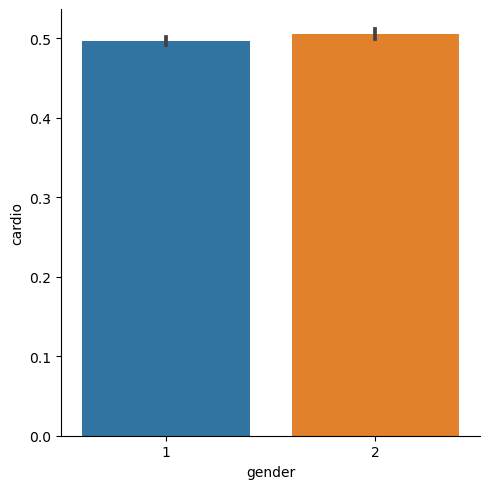

In [28]:
sns.catplot(data=df,y='cardio',x='gender',kind='bar')
plt.show()

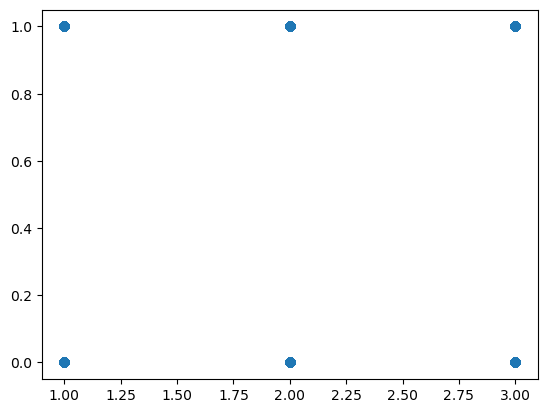

In [29]:
plt.scatter(df["cholesterol"],df["cardio"])

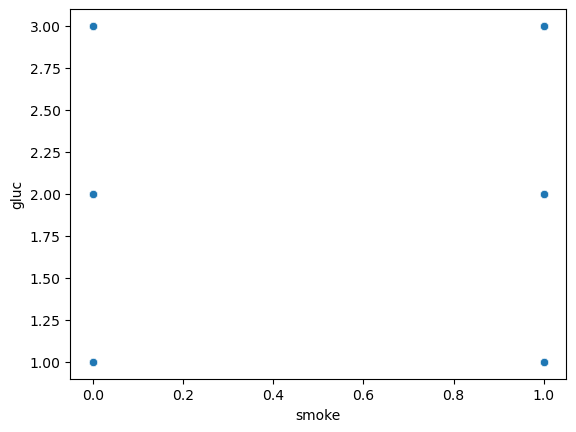

In [30]:
sns.scatterplot(data=df,y='gluc',x='smoke')
plt.show()

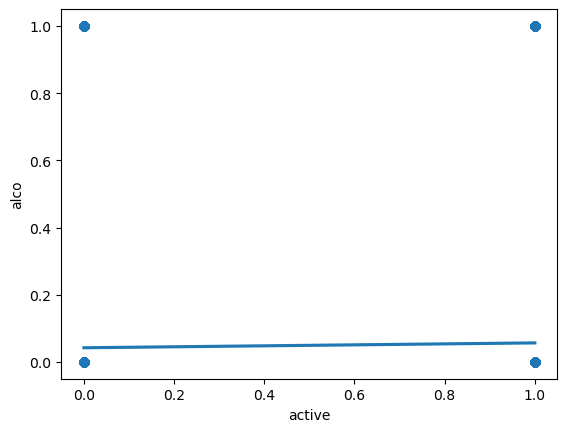

In [31]:
sns.regplot(data=df,y='alco',x='active')
plt.show()

## Data Correlation

In [32]:
corr_matrix = df.corr()
corr_matrix

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


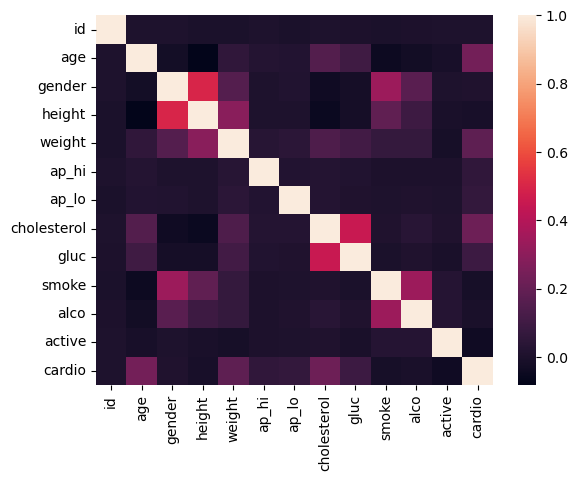

In [33]:
sns.heatmap(corr_matrix)
plt.show()

In [34]:
corr_matrix["cardio"]

id             0.003799
age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
cardio         1.000000
Name: cardio, dtype: float64

In [35]:
fhs=df.select_dtypes(include=['float'])
fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  70000 non-null  float64
dtypes: float64(1)
memory usage: 547.0 KB


In [36]:
fhs.corr()

,weight
weight,1.0


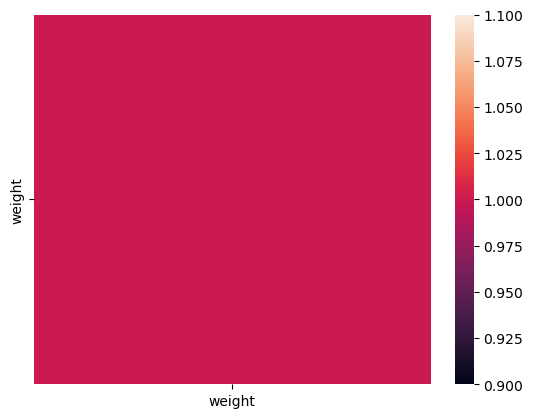

In [37]:
sns.heatmap(fhs.corr())
plt.show()

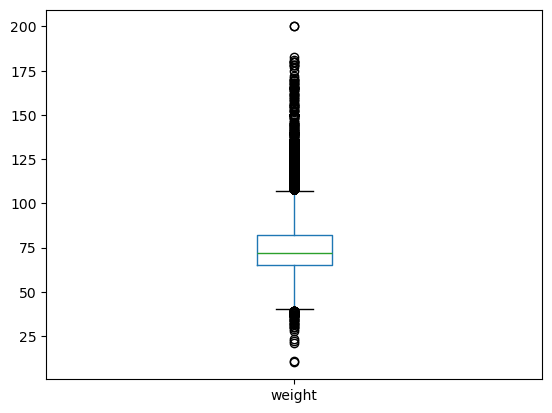

In [38]:
fhs.boxplot(grid=False)
plt.show()

In [39]:
fhs_int=df.select_dtypes(include=['int64'])
fhs_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   ap_hi        70000 non-null  int64
 5   ap_lo        70000 non-null  int64
 6   cholesterol  70000 non-null  int64
 7   gluc         70000 non-null  int64
 8   smoke        70000 non-null  int64
 9   alco         70000 non-null  int64
 10  active       70000 non-null  int64
 11  cardio       70000 non-null  int64
dtypes: int64(12)
memory usage: 6.4 MB


In [40]:
fhs_int.corr()

,id,age,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
ap_hi,0.003356,0.020764,0.006005,0.005488,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,0.001210,-0.029723,0.170966,0.094419,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


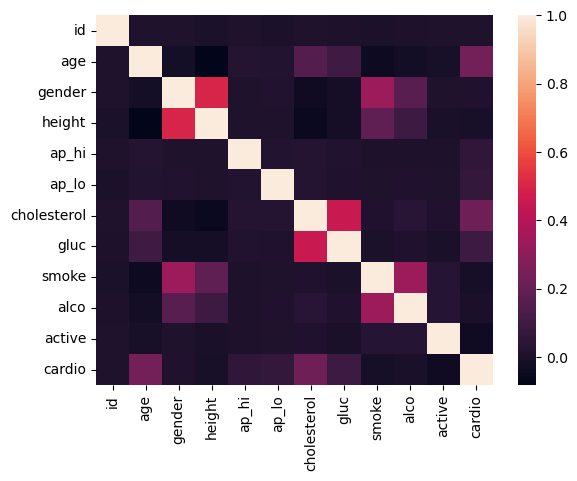

In [41]:
sns.heatmap(fhs_int.corr())
plt.show()

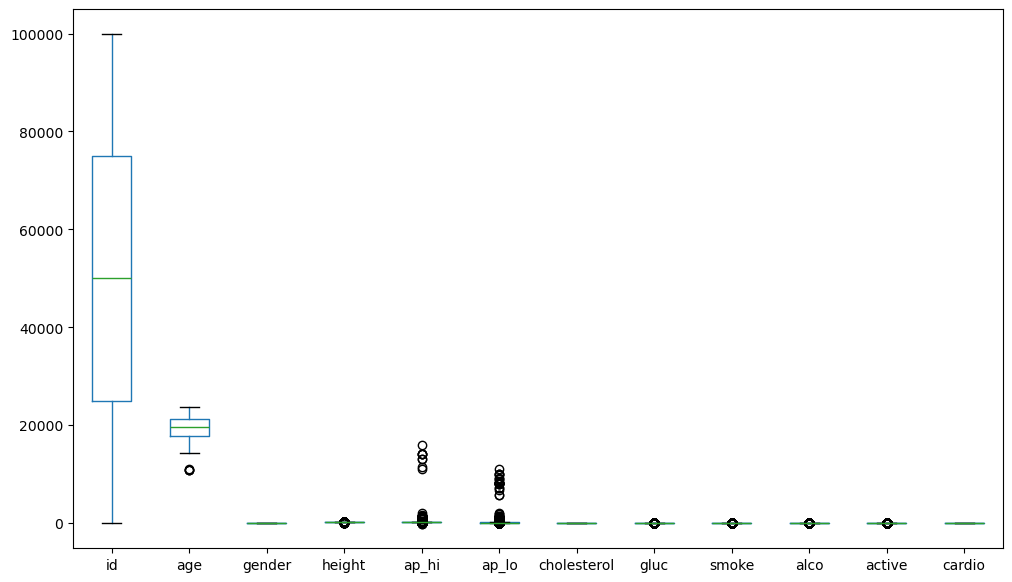

In [42]:
plt.figure(figsize=(12,7))
fhs_int.boxplot(grid=False)
plt.show()

In [43]:
df['cardio'].value_counts(normalize=True)

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

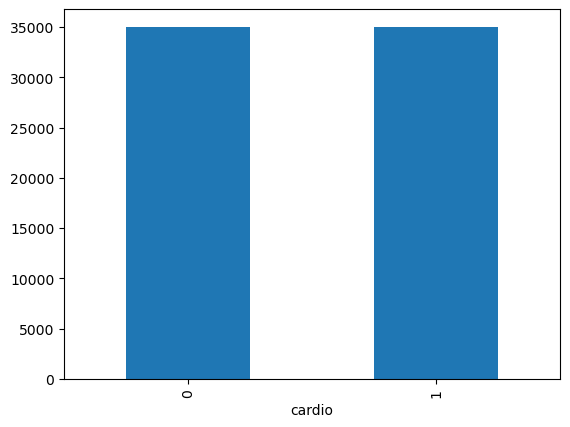

In [44]:
df['cardio'].value_counts().plot(kind='bar')
plt.show()

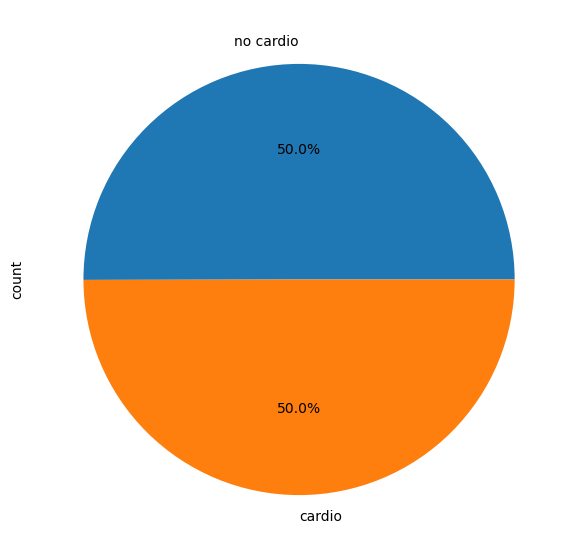

In [45]:
plt.figure(figsize=(10,7))
df['cardio'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['no cardio','cardio'])
plt.show()

In [46]:
fhs_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   ap_hi        70000 non-null  int64
 5   ap_lo        70000 non-null  int64
 6   cholesterol  70000 non-null  int64
 7   gluc         70000 non-null  int64
 8   smoke        70000 non-null  int64
 9   alco         70000 non-null  int64
 10  active       70000 non-null  int64
 11  cardio       70000 non-null  int64
dtypes: int64(12)
memory usage: 6.4 MB


In [47]:
X=fhs_int
X.shape

(70000, 12)

In [48]:
y=df['cardio']
y.shape

(70000,)

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
os=SMOTE(random_state=0)
X_os,y_os=os.fit_resample(X,y)

In [51]:
X_os.shape,y_os.shape

((70042, 12), (70042,))

In [52]:
y_os.value_counts(normalize=True)

cardio
0    0.5
1    0.5
Name: proportion, dtype: float64

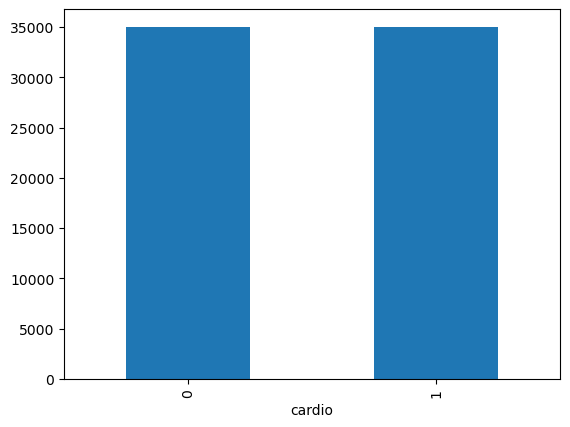

In [53]:
y_os.value_counts().plot(kind='bar')
plt.show()

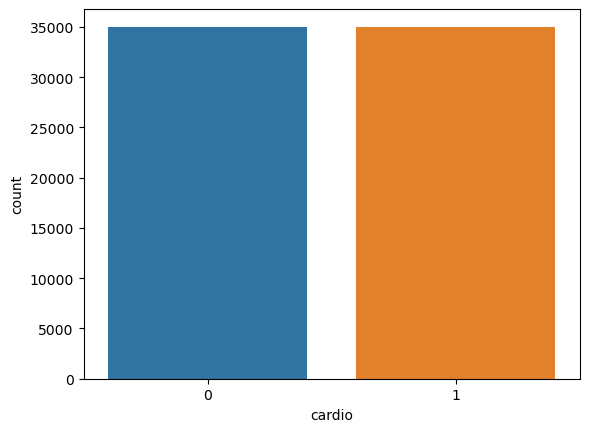

In [54]:
sns.countplot(x=y_os)
plt.show()

In [55]:
df_os=pd.DataFrame(X_os)
df_os['cardio']=y_os

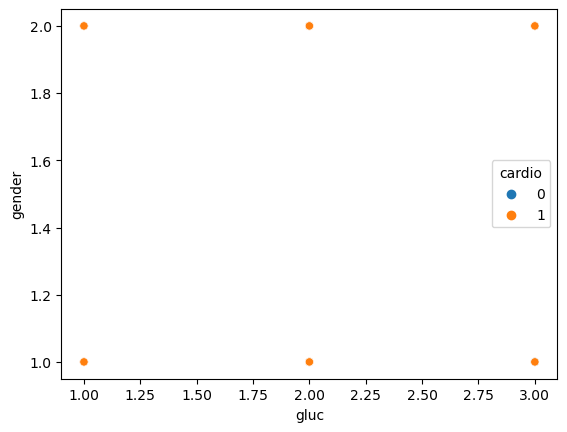

In [56]:
sns.scatterplot(data=df_os,x='gluc',y='gender',hue='cardio')
plt.show()

## KNN Classifier

In [57]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [58]:
x=df.iloc[:,7:12]
x

,cholesterol,gluc,smoke,alco,active
0,1,1,0,0,1
1,3,1,0,0,1
2,3,1,0,0,0
3,1,1,0,0,1
4,1,1,0,0,0
...,...,...,...,...,...
69995,1,1,1,0,1
69996,2,2,0,0,1
69997,3,1,0,1,0
69998,1,2,0,0,0


In [59]:
y=df.iloc[:,12:]
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [129]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.85,random_state=0)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

In [131]:
knn.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [132]:
ans=knn.predict(xtest)
ans

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [133]:
knn.score(xtest,ytest)

1.0

## Unsupervised Learning - Clustering - K Means Clustering

In [65]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [66]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=12)

In [67]:
km.fit(df[["cardio","cholesterol"]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saipr\AppData\Local\Temp\ipykernel_1264\2416004810.py:1: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  km.fit(df[["cardio","cholesterol"]])


KMeans(n_clusters=12)

In [68]:
km.cluster_centers_

array([[9.43689571e-16, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00],
       [5.55111512e-16, 2.00000000e+00],
       [1.11022302e-16, 3.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00]])

In [69]:
df["active"]=km.labels_
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,2,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,3,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,2,1


In [70]:
df["active"].value_counts()

active
0    29330
2    23055
1     6174
3     5750
4     3799
5     1892
Name: count, dtype: int64

<Axes: xlabel='cholesterol', ylabel='gluc'>

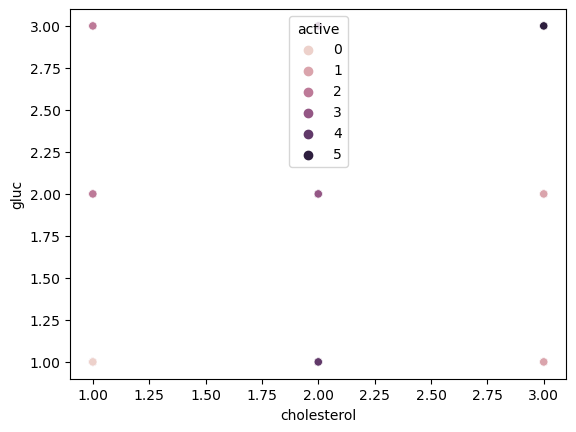

In [71]:
sns.scatterplot(x="cholesterol",y="gluc",hue="active",data=df)

In [72]:
cardio1=df[df["cardio"]==1]
cardio1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,2,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
15,24,16782,2,172,112.0,120,80,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,2,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,2,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,3,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,1,1


## Decision Tree Classifier

In [73]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,2,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,3,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,2,1


In [74]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [75]:
df["cholesterol"].unique()

array([1, 3, 2], dtype=int64)

In [76]:
df["gluc"].unique()

array([1, 2, 3], dtype=int64)

In [77]:
df["smoke"].unique()

array([0, 1], dtype=int64)

In [78]:
df["alco"].unique()

array([0, 1], dtype=int64)

In [79]:
df["active"].unique()

array([0, 1, 2, 4, 5, 3])

In [80]:
df["cardio"].unique()

array([0, 1], dtype=int64)

In [81]:
x=df.iloc[:,7:12]
x

,cholesterol,gluc,smoke,alco,active
0,1,1,0,0,0
1,3,1,0,0,1
2,3,1,0,0,1
3,1,1,0,0,2
4,1,1,0,0,0
...,...,...,...,...,...
69995,1,1,1,0,0
69996,2,2,0,0,3
69997,3,1,0,1,1
69998,1,2,0,0,2


In [82]:
xtrain

,cholesterol,gluc,smoke,alco,active
25000,1,1,0,0,1
67015,2,1,0,0,1
32099,1,1,0,0,1
18317,1,1,0,0,1
17479,1,1,0,0,0
...,...,...,...,...,...
39202,1,1,0,0,1
28547,3,1,0,0,1
37527,1,1,0,0,1
7147,1,1,0,0,1


In [83]:
ytrain

,cardio
25000,0
67015,1
32099,0
18317,0
17479,0
...,...
39202,1
28547,1
37527,0
7147,1


In [84]:
xtest

,cholesterol,gluc,smoke,alco,active
23691,1,2,0,1,1
63237,3,1,0,0,1
48379,1,1,0,0,1
42960,3,1,0,0,1
68935,1,1,0,0,0
...,...,...,...,...,...
1972,1,1,0,0,1
46937,1,1,0,0,1
58164,1,1,0,0,1
11384,2,1,0,0,1


In [85]:
ytest

,cardio
23691,1
63237,0
48379,0
42960,1
68935,1
...,...
1972,0
46937,0
58164,0
11384,1


In [136]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.85,random_state=0)

In [137]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [138]:
ans=dtc_model.predict(xtest)
ans

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [139]:
dtc_model.score(xtest,ytest)

1.0

## Random Forest Classifier

In [140]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.85,random_state=0)

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=3)
rfc.fit(xtrain,ytrain)

C:\Users\saipr\AppData\Local\Temp\ipykernel_1264\2145831678.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=3)

In [142]:
ans=rfc.predict(xtest)
ans

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [143]:
rfc.score(xtest,ytest)

1.0

In [144]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ans)
cm

array([[5286,    0],
       [   0, 5214]], dtype=int64)

## Support Vector Machine 

In [93]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,2,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,3,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,2,1


In [94]:
xtrain

,cholesterol,gluc,smoke,alco,active
25000,1,1,0,0,1
67015,2,1,0,0,1
32099,1,1,0,0,1
18317,1,1,0,0,1
17479,1,1,0,0,0
...,...,...,...,...,...
39202,1,1,0,0,1
28547,3,1,0,0,1
37527,1,1,0,0,1
7147,1,1,0,0,1


In [95]:
len(xtrain)

59500

In [96]:
ytrain

,cardio
25000,0
67015,1
32099,0
18317,0
17479,0
...,...
39202,1
28547,1
37527,0
7147,1


In [97]:
xtest

,cholesterol,gluc,smoke,alco,active
23691,1,2,0,1,1
63237,3,1,0,0,1
48379,1,1,0,0,1
42960,3,1,0,0,1
68935,1,1,0,0,0
...,...,...,...,...,...
1972,1,1,0,0,1
46937,1,1,0,0,1
58164,1,1,0,0,1
11384,2,1,0,0,1


In [98]:
len(xtest)

10500

In [99]:
ytest

,cardio
23691,1
63237,0
48379,0
42960,1
68935,1
...,...
1972,0
46937,0
58164,0
11384,1


In [145]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

In [146]:
xtrain

,cholesterol,gluc,smoke,alco,active
43395,3,1,0,0,1
34399,1,1,0,0,0
24774,1,1,0,0,0
52089,1,1,0,0,2
15390,1,1,0,0,0
...,...,...,...,...,...
21243,3,3,0,0,1
45891,3,3,0,1,1
42613,1,1,0,0,0
43567,1,1,0,0,0


In [147]:
len(xtrain)

56000

In [148]:
ytrain

,cardio
43395,1
34399,0
24774,0
52089,1
15390,0
...,...
21243,1
45891,1
42613,0
43567,0


In [149]:
xtest

,cholesterol,gluc,smoke,alco,active
10840,1,1,0,0,0
56267,1,1,0,0,0
14849,1,1,0,0,0
62726,1,1,0,0,0
47180,1,1,0,0,0
...,...,...,...,...,...
29357,3,3,0,1,1
52488,1,1,0,0,0
9603,2,1,0,0,3
34949,1,1,1,0,0


In [150]:
len(xtest)

14000

In [151]:
ytest

,cardio
10840,0
56267,0
14849,0
62726,0
47180,0
...,...
29357,1
52488,0
9603,1
34949,0


In [152]:
from sklearn.svm import SVC
svc_model=SVC()

In [153]:
svc_model.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [154]:
ans=svc_model.predict(xtest)
ans

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [155]:
svc_model.score(xtest,ytest)

1.0

## Naive Bayes Classifier

In [156]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.85,random_state=0)

In [157]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [158]:
nb.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [159]:
ans=nb.predict(xtest)
ans

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [160]:
nb.score(xtest,ytest)

0.9726666666666667

In [161]:
nb.predict([[1,1,0,0,1]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [162]:
nb.predict([[1,2,0,0,4]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Logistic Regression

In [117]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,2,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,3,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,2,1


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.85,random_state=0)
from sklearn.metrics import accuracy_score

In [164]:
model_lr= LogisticRegression(solver='liblinear')

In [165]:
model_lr.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [166]:
results=model_lr.score(xtest,ytest)
results*100

90.64761904761905

In [167]:
results=model_lr.score(xtrain,ytrain)
results*100

90.74285714285715

In [168]:
model_lr.score(xtest,ytest)

0.9064761904761904

In [169]:
ans1=model_lr.predict(xtest)
ans1

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [170]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ans1)
cm

array([[4430,  856],
       [ 126, 5088]], dtype=int64)

Text(33.22222222222222, 0.5, 'actual')

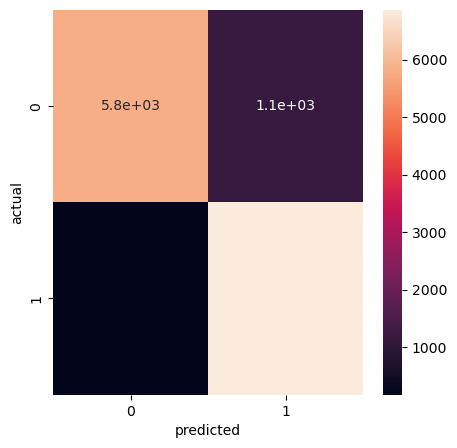

In [126]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")